# _Analytics Examples for Unity_

# Notebook Setup

In the cell below are a few functions that help with plotting data using matplotlib. You shouldn't need to modify or pay much attention to this cell. Just run the cell to define the functions so that they can be used in the rest of the notebook.

In [1]:
%matplotlib inline
#######################################################################################
# In some jupyter deployments you will get an error about PROJ_LIB not being defined.
# In that case, uncomment these lines and set the directory to the location of your
# proj folder.
# import os
# import sys
# # Find where we are on the computer and make sure it is the pyICM directory
# HomeDir = os.path.expanduser('~')  # get the home directory

# ICMDir = HomeDir + "Desktop/AIST_Project/SDAP_Jupyter"
# # Navigate to the home directory
# os.chdir(ICMDir)
# print('Moved to Directory',ICMDir)

# module_path = os.path.join(ICMDir,'code')
# print('Code Directory is',module_path)
# print('Adding to the system path')
# if module_path not in sys.path:
#     sys.path.append(module_path)
#######################################################################################
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
# from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs #added by B Clark because Basemap is deprecated
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import types
import math
import sys
import time
import requests
from datetime import datetime
import itertools
from shapely.geometry import box
from pprint import pprint, pformat
import textwrap
import warnings
warnings.filterwarnings("ignore")

# ISO-8601 date format
dt_format = "%Y-%m-%dT%H:%M:%SZ"

def show_plot(x_data, y_data, x_label=None, y_label=None, title=None):
    """
    Display a simple line plot.
    
    :param x_data: Numpy array containing data for the X axis
    :param y_data: Numpy array containing data for the Y axis
    :param x_label: Label applied to X axis
    :param y_label: Label applied to Y axis
    """
    plt.figure(figsize=(6,3), dpi=100)
    plt.plot([datetime.fromtimestamp(x_val) for x_val in x_data], y_data, 'b-', marker='|', markersize=2.0, mfc='b')
    plt.grid(b=True, which='major', color='k', linestyle='-')
    if title is not None:
        plt.title(title)
    if x_label is not None:
        plt.xlabel(x_label)
    if y_label is not None:
        plt.ylabel (y_label)
    plt.xticks(rotation=45)
    ts_range = x_data[-1] - x_data[0]

    # Define the time formatting
    if ts_range > 189216000: # 6 years
        dtFmt = mdates.DateFormatter('%Y')
    elif ts_range > 15552000: # 6 months
        dtFmt = mdates.DateFormatter('%b %Y')
    else: # < 6 months
        dtFmt = mdates.DateFormatter('%b %-d, %Y')

    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.show()

def plot_box(bbox):
    """
    Display a Green bounding box on an image of the blue marble.
    
    :param bbox: Shapely Polygon that defines the bounding box to display
    """
    min_lon, min_lat, max_lon, max_lat = bbox.bounds
    import matplotlib.pyplot as plt1
    import cartopy.crs as ccrs #added by B Clark because Basemap is deprecated
    # modified 11/30/2021 to use Cartopy toolbox B Clark NASA GSFC
    # from matplotlib.patches import Polygon
    # from mpl_toolkits.basemap import Basemap
    from shapely.geometry.polygon import Polygon
    # map = Basemap()
    # map.bluemarble(scale=0.5)
    # poly = Polygon([(min_lon,min_lat),(min_lon,max_lat),(max_lon,max_lat),(max_lon,min_lat)],
    #                facecolor=(0,0,0,0.0),edgecolor='green',linewidth=2)
    # plt1.gca().add_patch(poly)
    # plt1.gcf().set_size_inches(10,15)
    ax = plt1.axes(projection=ccrs.PlateCarree())
    ax.stock_img()
    # plt.show()     
    poly = Polygon(((min_lon,min_lat),(min_lon,max_lat),(max_lon,max_lat),(max_lon,min_lat),(min_lon,min_lat)))
    ax.add_geometries([poly],crs=ccrs.PlateCarree(),facecolor='b', edgecolor='red', alpha=0.8)
    # ax.fill(x, y,  color='coral', alpha=0.4)
    # plt1.gca().add_patch(poly)
    # plt1.gcf().set_size_inches(10,15)
    plt1.show()

def show_plot_two_series(x_data_a, x_data_b, y_data_a, y_data_b, x_label, 
                         y_label_a, y_label_b, series_a_label, series_b_label,
                         title=''):
    """
    Display a line plot of two series
    
    :param x_data_a: Numpy array containing data for the Series A X axis
    :param x_data_b: Numpy array containing data for the Series B X axis
    :param y_data_a: Numpy array containing data for the Series A Y axis
    :param y_data_b: Numpy array containing data for the Series B Y axis
    :param x_label: Label applied to X axis
    :param y_label_a: Label applied to Y axis for Series A
    :param y_label_b: Label applied to Y axis for Series B
    :param series_a_label: Name of Series A
    :param series_b_label: Name of Series B
    """ 
    font_size=12
    plt.rc('font', size=font_size)          # controls default text sizes
    plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
    plt.rc('axes', labelsize=font_size)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_size)    # legend fontsize
    plt.rc('figure', titlesize=font_size)  # fontsize of the figure title
    fig, ax1 = plt.subplots(figsize=(10,5), dpi=100)
    series_a, = ax1.plot(x_data_a, y_data_a, 'b-', marker='|', markersize=2.0, mfc='b', label=series_a_label)
    ax1.set_ylabel(y_label_a, color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim(min(0, *y_data_a), max(y_data_a)+.1*max(y_data_a))
    ax1.set_xlabel(x_label)
    
    ax2 = ax1.twinx()
    series_b, = ax2.plot(x_data_b, y_data_b, 'r-', marker='|', markersize=2.0, mfc='r', label=series_b_label)
    ax2.set_ylabel(y_label_b, color='r')
    ax2.set_ylim(min(0, *y_data_b), max(y_data_b)+.1*max(y_data_b))
    ax2.tick_params('y', colors='r')
    
    plt.grid(b=True, which='major', color='k', linestyle='-')
    plt.legend(handles=(series_a, series_b), bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
    plt.title(title)
    plt.show()

def ts_plot_two(ts_json1, ts_json2, dataset1, dataset2, units1, units2,
            title='', t_name='time', val_name='mean'):
    t1 = np.array([ts[0][t_name] for ts in ts_json1["data"]])
    t2 = np.array([ts[0][t_name] for ts in ts_json2["data"]])
    vals1 = np.array([ts[0][val_name] for ts in ts_json1["data"]])
    vals2 = np.array([ts[0][val_name] for ts in ts_json2["data"]])
    show_plot_two_series(t1, t2, vals1, vals2, "time (sec since 1970-01-01T00:00:00)",
                         units1, units2, dataset1, dataset2, title=title)

def scatter_plot(ts_json1, ts_json2, t_name="time", val_name="mean",
                title="", xlabel="", ylabel=""):
    times1 = np.array([ts[0][t_name] for ts in ts_json1["data"]])
    times2 = np.array([ts[0][t_name] for ts in ts_json2["data"]])
    vals1 = np.array([ts[0][val_name] for ts in ts_json1["data"]])
    vals2 = np.array([ts[0][val_name] for ts in ts_json2["data"]])
    vals_x = []
    vals_y = []
    for i1,t1 in enumerate(times1):
        i = (np.abs(times2-times1[i1])).argmin()
        if np.abs(times1[i1]-times2[i]) < 86400: # 24 hrs
            vals_x.append(vals1[i1])
            vals_y.append(vals2[i])
    plt.scatter(vals_x, vals_y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def roundBorders(borders, borderSlop=10.):
    b0 = roundBorder(borders[0], 'down', borderSlop,   0.)
    b1 = roundBorder(borders[1], 'down', borderSlop, -90.)
    b2 = roundBorder(borders[2],   'up', borderSlop, 360.)
    b3 = roundBorder(borders[3],   'up', borderSlop,  90.)
    return [b0, b1, b2, b3]

def roundBorder(val, direction, step, end):
    if direction == 'up':
        rounder = math.ceil
        slop = step
    else:
        rounder = math.floor
        slop = -step
###    v = rounder(val/step) * step + slop                                      
    v = rounder(val/step) * step
    if abs(v - end) < step+1.: v = end
    return v

def normalizeLon(lon):
    if lon < 0.: return lon + 360.
    if lon > 360.: return lon - 360.
    return lon

def normalizeLons(lons):
    return np.array([normalizeLon(lon) for lon in lons])

def ensureItems(d1, d2):
    for key in d2.keys():
        if key not in d1: d1[key] = d2[key]

CmdOptions = {'MCommand':  ['title', 'xlabel', 'ylabel',  'xlim', 'ylim', 'show\
'],
   	      'plot':      ['label', 'linewidth', 'legend', 'axis'],
              'map.plot':  ['label', 'linewidth', 'axis'],
              'map.scatter':  ['norm', 'alpha', 'linewidths', 'faceted', 'hold'\
],
              'savefig':   ['dpi', 'orientation']
              }

def die(*s):   warn('Error,',  *s); sys.exit()
    
def evalKeywordCmds(options, cmdOptions=CmdOptions):
    for option in options:
        if option in cmdOptions['MCommand']:
            args = options[option]
            if args:
                if args is True:
                    args = ''
                else:
                    args = "'" + args + "'"
                if option in cmdOptions:
                    args += dict2kwargs( validCmdOptions(options, cmdOptions[option]) )
                try:
                    eval('plt.' + option + '(%s)' % args)
                except:
                    die('failed eval of keyword command option failed: %s=%s' % (option, args))

def validCmdOptions(options, cmd, possibleOptions=CmdOptions):
    return dict([(option, options[option]) for option in options.keys()
                    if option in possibleOptions[cmd]])

def dict2kwargs(d):
    args = [',%s=%s' % (kw, d[kw]) for kw in d]
    return ', '.join(args)

def imageMap(lons, lats, vals, vmin=None, vmax=None, 
             imageWidth=None, imageHeight=None, outFile=None,
             projection='cyl', cmap=plt.cm.jet, logColors=False, makeFigure=False,
             borders=[0., -90., 360., 90.], autoBorders=True, borderSlop=10.,
             meridians=[0, 360, 60], parallels=[-60, 90, 30], title='', normalizeLongs=True,
             **options):
    if normalizeLongs:
        lons = normalizeLons(lons)
    if vmin == 'auto': vmin = None
    if vmax == 'auto': vmax = None
    if imageWidth is not None: makeFigure = True
    if projection is None or projection == '': projection = 'cyl'
    if cmap is None or cmap == '': cmap = plt.cm.jet
    #if isinstance(cmap, types.StringType) and cmap != '':
    if isinstance(cmap, str) and cmap != '':
        try:
            cmap = eval('plt.cm.' + cmap)
        except:
            cmap = plt.cm.jet

    ensureItems(options, { \
                     'title': title, 'dpi': 100,
                     'imageWidth': imageWidth or 1024, 'imageHeight': imageHeight or 768})
    if autoBorders:
        borders = [min(lons), min(lats), max(lons), max(lats)]
        borders = roundBorders(borders, borderSlop)

    #m = Basemap(borders[0], borders[1], borders[2], borders[3], \
    #            projection=projection, lon_0=np.average([lons[0], lons[-1]]))

    if makeFigure:
        dpi = float(options['dpi'])
        width = float(imageWidth) / dpi
        height = width
        #if imageHeight is None:
        #    height = width * m.aspect
        #else:
        #    height = float(imageHeight) / dpi
        #plt.figure(figsize=(width,height)).add_axes([0.1,0.1,0.8,0.8], frameon=True)
        plt.figure(figsize=(width,height))
        m = plt.axes(projection=ccrs.PlateCarree())
        #m.set_extent([meridians[0], meridians[1], parallels[0], parallels[1]],
        #             crs=ccrs.PlateCarree())
        gl = m.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                         linewidth=2, color='gray', alpha=0.5, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlines = True
        gl.ylines = True
        gl.xlocator = mticker.FixedLocator(np.arange(meridians[0], meridians[1]+meridians[2], meridians[2]))
        gl.ylocator = mticker.FixedLocator(np.arange(parallels[0], parallels[1]+parallels[2], parallels[2]))
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 12, 'color': 'black'}
        gl.ylabel_style = {'size': 12, 'color': 'black'}
        
    if vmin is not None or vmax is not None: 
        if vmin is None:
            vmin = np.min(vals)
        else:
            vmin = float(vmin)
        if vmax is None:
            vmax = np.max(vals)
        else:
            vmax = float(vmax)
        #vrange = (vmax - vmin) / 255.
        #levels = np.arange(vmin, vmax, vrange/30.)
        levels = np.linspace(vmin, vmax, 256)
    else:
        levels = 30

    if logColors:
        norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)
    else:
        norm = None
    # x, y = m(*np.meshgrid(lons,lats))
    x, y = np.meshgrid(lons,lats)
    c = m.contourf(x, y, vals, levels, cmap=cmap, colors=None, norm=norm)
    # m.drawcoastlines()
    m.coastlines()
    #m.drawmeridians(range(meridians[0], meridians[1], meridians[2]), labels=[0,0,0,1])
    #m.drawparallels(range(parallels[0], parallels[1], parallels[2]), labels=[1,1,1,1])
    plt.colorbar(c, ticks=np.linspace(vmin,vmax,7), shrink=0.6)
    evalKeywordCmds(options)
    if outFile:
        plt.savefig(outFile, **validCmdOptions(options, 'savefig'))
    
def arr2d_from_json(js, var_name):
    return np.array([[js[i][j][var_name] for j in range(len(js[0]))] for i in range(len(js))])

def arr1d_from_json(js, var_name):
    return np.array([js[i][var_name] for i in range(len(js))])

def plot_map(map, val_key="mean", cnt_key="cnt", lon_key="lon", lat_key="lat", fill=-9999, grid_line_sep=10,
             border_slop=1, log_colors=False, title='', vmin=None, vmax=None, 
             normalize_lons=False, image_width=1000, **options):
    # Parse values, longitudes and latitudes from JSON response.
    vals = arr2d_from_json(map, val_key)
    cnts = arr2d_from_json(map, cnt_key)
    lons = arr1d_from_json(map[0], lon_key)
    lats = arr1d_from_json([map[i][0] for i in range(len(map))], lat_key)
    
    # If cnt is 0, set value to fill
    vals[cnts==0] = fill
    
    # Plot time time-averaged map as an image.
    print("Creating plot of the results.")
    print("This will take a minute.  Please wait...")
    min_val = np.min(vals[vals != fill])
    if vmin is None:
        vmin = min_val
    max_val = np.max(vals[vals != fill])
    if vmax is None:
        vmax = max_val
    min_lon = math.floor(np.min(lons)) - grid_line_sep
    max_lon = math.ceil(np.max(lons))
    min_lat = math.floor(np.min(lats)) - grid_line_sep
    max_lat = math.ceil(np.max(lats))
    imageMap(lons, lats, vals, imageWidth=image_width, vmin=vmin, vmax=vmax, logColors=log_colors,
             meridians=[min_lon, max_lon, grid_line_sep], 
             parallels=[min_lat, max_lat, grid_line_sep], borderSlop=border_slop, 
             title=title, normalizeLongs=normalize_lons, **options)
    
def ts_plot(ts_json, t_name='time', val_name='mean', 
            title='', units=''):
    t = np.array([ts[0][t_name] for ts in ts_json["data"]])
    vals = np.array([ts[0][val_name] for ts in ts_json["data"]])
    show_plot(t, vals, title=textwrap.fill(title,64),
              y_label=textwrap.fill(units,32))

def plot_hovmoller(hm, time_key="time", val_key="mean",
                   coord_series_key="lats", coord_point_key="latitude",
                   coord_axis_vert=True, fill=-9999.,
                   hovfig=None, subplot=111, add_color_bar=True,
                   title=""):
    times = [d[time_key] for d in hm]
    times = mdates.epoch2num(times)
    coords = [[d[coord_point_key] for d in hvals[coord_series_key]]
               for hvals in hm]
    coords_flat = np.array(sorted(list(set(itertools.chain(*coords)))))
    coords_delta = np.median(coords_flat[1:] - coords_flat[:-1])
    coords_min = np.amin(coords_flat)
    coords_max = np.amax(coords_flat)
    vals_fill = np.full((len(hm),len(coords_flat)), fill, dtype=np.float64)
    t_ind = 0
    for hvals in hm:
        cur_vals = np.array([d[val_key] for d in hvals[coord_series_key]])
        coords = np.array([d[coord_point_key] for d in hvals[coord_series_key]])
        coords_inds = np.round((coords - coords_min) /
                               coords_delta).astype(int)
        vals_fill[t_ind, coords_inds] = cur_vals
        t_ind += 1
    vals = np.ma.array(data=vals_fill, mask=vals_fill == fill)
    extent = [np.min(times), np.max(times), coords_min, coords_max]
    dtFmt = mdates.DateFormatter('%b %Y') # define the formatting
    if hovfig is None:
        fig = plt.figure(figsize=(16,6))
    else:
        fig = hovfig
    ax = fig.add_subplot(subplot)
    ax.set_title(title)
    if coord_axis_vert:
        vals = np.transpose(vals)
        ax.xaxis.set_major_formatter(dtFmt)
        ax.set_ylabel(coord_point_key)
        plt.xticks(rotation=45)
    else:
        extent = [extent[2], extent[3], extent[0], extent[1]]
        ax.yaxis.set_major_formatter(dtFmt)
        ax.set_xlabel(coord_point_key)
    cax = ax.imshow(vals, origin='lower', extent=extent)
    ax.set_aspect('auto')
    if add_color_bar:
        fig.colorbar(cax, ticks=np.linspace(np.min(vals), np.max(vals), 7),
                     orientation='vertical')
    return fig

def compute_ts_and_tam_no_plot(dataset, bbox, start_time, end_time, base_url="localhost",
                               seasonal_filter="false"):
    url_params = 'ds={}&minLon={}&minLat={}&maxLon={}&maxLat={}&startTime={}&endTime={}'.\
        format(dataset, *bbox.bounds, 
               start_time.strftime(dt_format), end_time.strftime(dt_format))
    ts_url = '{}/timeSeriesSpark?{}&seasonalFilter={}'.format(base_url, url_params,
                                                              seasonal_filter)
    tam_url = '{}/timeAvgMapSpark?{}'.format(base_url, url_params)

    # Display some information about the job
    print(ts_url); print()
    print(tam_url); print()

    # Query SDAP to compute the time series
    print("Computing time series...")
    start = time.perf_counter()
    ts_json = requests.get(ts_url, verify=False).json()
    print("Area-averaged time series took {} seconds".format(time.perf_counter() - start))
    print()
    
    # Query SDAP to compute the time averaged map
    print("Computing time averaged map...")
    start = time.perf_counter()
    #tam_json = requests.get(tam_url, verify=False).json()
    tam_json = {}
    print("Time averaged map took {} seconds".format(time.perf_counter() - start))
    return ts_json, tam_json

def compute_ts_and_tam(dataset, bbox, start_time, end_time, base_url="localhost",
                       seasonal_filter="false", title='', grid_line_sep=5,
                       units=None, log_colors=False, normalize_lons=False, **options):
    ts_json, tam_json = compute_ts_and_tam_no_plot(dataset, bbox, start_time, end_time,
                                                   base_url=base_url,
                                                   seasonal_filter=seasonal_filter)
    print()
    print("Plot of area-average time series:")
    ts_plot(ts_json, val_name='mean', title=title, units=units)
    if seasonal_filter == "true":
        print("Plot of time series of difference with climatology:")
        ts_plot(ts_json, val_name='meanSeasonal',
                title=title, units=units)
        print()
    
    # Query SDAP to compute the time averaged map
    #tam = tam_json["data"]
    #plot_map(tam, log_colors=log_colors, grid_line_sep=grid_line_sep, title=title, 
    #         normalize_lons=normalize_lons, **options)

def show_sdap_json(j, nh=20, nt=10):
    out_str = pformat(j)
    for line in out_str.splitlines()[:nh]:
        print(line)
    print("\t\t.\n"*3)
    for line in out_str.splitlines()[-nt:]:
        print(line)

print('Done with plotting setup.')

Done with plotting setup.


# Science Data Analytics Platform (SDAP)
SDAP (https://sdap.apache.org/) provides advanced analytics capabilities to support NASA's New Observing Strategies (NOS) and Analytic Collaborative Frameworks (ACF) thrusts.  In this notebook we demonstrate how SDAP can be used to better understand scientific datasets.

SDAP provides web service endpoints for each analytic algorithm, and can be accessed in a web browser or from a variety of programming languages.  This notebook demonstrates the Python API to access SDAP.

## Demonstration Setup

In the cell below, we specify the location of the SDAP deployments to use, a dataset to be used, the 
bounding box for an area of interest, and a time range for analysis.

dataset: JPL_MUR25-JPL-L4-GLOB-v04.2
spatial region POLYGON ((-70 35, -70 42, -77 42, -77 35, -70 35)), and time range 2022-01-01 00:00:00 to 2022-01-31 00:00:00.


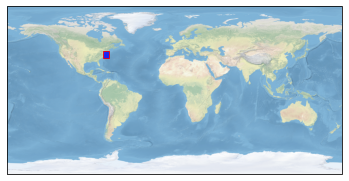

In [10]:
# Base URL for the SDAP deployment.
base_url = "http://addad66bfe6b44e7e91f5afcf7e7711f-1857820307.us-west-2.elb.amazonaws.com:8083/nexus"

# Define bounding box and time period for analysis
min_lon = -77; max_lon = -70
min_lat = 35; max_lat = 42
bbox = box(min_lon, min_lat, max_lon, max_lat)

# Specify the SDAP name of the datasets
dataset = "JPL_MUR25-JPL-L4-GLOB-v04.2"
start_time = datetime(2022, 1, 1)
end_time = datetime(2022, 1, 31)

print("dataset: {}".format(dataset))
print("spatial region {}, and time range {} to {}.".
      format(bbox, start_time, end_time))
plot_box(bbox)

# Cloud Analytics
## Data Inventory
We begin by querying the SDAP `/list` endpoint at each of our SDAP deployments to examine what data are available in each instantiation of SDAP.

In [11]:
def get_sdap_inv(base_url):
    url = '{}/list'.format(base_url)
    print("Web Service Endpoint:"); print(url);
    res = requests.get(url, verify=False).json()
    pprint(res)

print("Response from SDAP:")
get_sdap_inv(base_url)

Response from SDAP:
Web Service Endpoint:
http://addad66bfe6b44e7e91f5afcf7e7711f-1857820307.us-west-2.elb.amazonaws.com:8083/nexus/list
[{'end': 1643619600.0,
  'iso_end': '2022-01-31T09:00:00+0000',
  'iso_start': '2022-01-01T09:00:00+0000',
  'shortName': 'JPL_MUR25-JPL-L4-GLOB-v04.2',
  'start': 1641027600.0,
  'tileCount': 992,
  'title': 'JPL_MUR25-JPL-L4-GLOB-v04.2'}]


## Area-Averaged Time Series
Next we will make a simple web service call to the SDAP `/timeSeriesSpark` endpoint.  This can also be done in a web browser or in a variety of programming languages.

In [12]:
# Compute time series using the SDAP/NEXUS web/HTTP interface
#
# Construct the URL
url = '{}/timeSeriesSpark?ds={}&minLon={}&minLat={}&maxLon={}&maxLat={}&startTime={}&endTime={}&seasonalFilter={}'.\
    format(base_url, dataset, *bbox.bounds, 
           start_time.strftime(dt_format), end_time.strftime(dt_format),
           "false")

# Display some information about the job
print(url); print()

# Query SDAP to compute the time averaged map
print("Waiting for response from SDAP...")
start = time.perf_counter()
ts_json = requests.get(url, verify=False).json()
print("Time series took {} seconds".format(time.perf_counter() - start))

http://addad66bfe6b44e7e91f5afcf7e7711f-1857820307.us-west-2.elb.amazonaws.com:8083/nexus/timeSeriesSpark?ds=JPL_MUR25-JPL-L4-GLOB-v04.2&minLon=-77.0&minLat=35.0&maxLon=-70.0&maxLat=42.0&startTime=2022-01-01T00:00:00Z&endTime=2022-01-31T00:00:00Z&seasonalFilter=false

Waiting for response from SDAP...
Time series took 2.5550954159998582 seconds


### JSON response
The SDAP web service calls return the result in `JSON`, a standard web services data
interchange format.  This makes it easy for another web service component to "consume" the SDAP output.
Let's view the JSON response.  It is long, so we'll show just the first few time values.

In [13]:
show_sdap_json(ts_json, nh=33, nt=10)

{'data': [[{'cnt': 557,
            'ds': 0,
            'iso_time': '2022-01-01T09:00:00+0000',
            'max': 25.0260009765625,
            'maxLowPass': 25.024645849500388,
            'mean': 16.21296501159668,
            'meanLowPass': 16.212496883891266,
            'min': 6.928009033203125,
            'minLowPass': 6.919931832168205,
            'std': 5.3330701716519275,
            'time': 1641027600}],
          [{'cnt': 557,
            'ds': 0,
            'iso_time': '2022-01-02T09:00:00+0000',
            'max': 25.441986083984375,
            'maxLowPass': 25.45920287000687,
            'mean': 16.201152801513672,
            'meanLowPass': 16.226484798712917,
            'min': 6.897003173828125,
            'minLowPass': 6.976654032763646,
            'std': 5.290434668417779,
            'time': 1641114000}],
          [{'cnt': 557,
            'ds': 0,
            'iso_time': '2022-01-03T09:00:00+0000',
            'max': 25.303009033203125,
            'maxLow

### Plot the result
Let's check our time series result with a plot. An SDAP dataset can also be associated with its climatology (long-term average for a given time period like monthly or daily). If this is the case, we can apply a "seasonal filter" to compute the spatial average of the difference between the dataset and its climatology as a time series.

Plot of area-average time series:


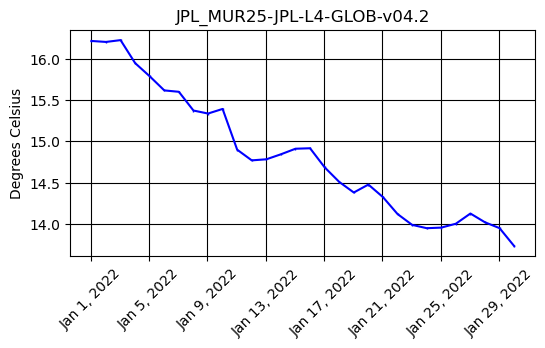

In [14]:
# Plot the result
print("Plot of area-average time series:")
ts_plot(ts_json, val_name='mean', title=dataset, units='Degrees Celsius')

## Time Averaged Map
Next we will issue an SDAP web service call to compute a time averaged map.  While the time series algorithm used above averages spatially to produce a single value for each time stamp, the time average map averages over time to produce a single value at each grid cell location.  While the time series produces a 1D result indexed by time, the time averaged map produces a 2D map indexed by latitude and longitude.

In [ ]:
# Compute time-averaged map using the SDAP/NEXUS web/HTTP interface
#
# Construct the URL
url = '{}/timeAvgMapSpark?ds={}&minLon={}&minLat={}&maxLon={}&maxLat={}&startTime={}&endTime={}'.\
    format(base_url, dataset, *bbox.bounds, 
           start_time.strftime(dt_format), end_time.strftime(dt_format))

# Display some information about the job
print(url); print()

# Query SDAP to compute the time averaged map
print("Waiting for response from SDAP...")
start = time.perf_counter()
tam_json = requests.get(url, verify=False).json()
print("Time averaged map took {} seconds".format(time.perf_counter() - start))

### JSON response
The SDAP web service calls return the result in `JSON`, a standard web services data
interchange format.  This makes it easy for another web service component to "consume" the SDAP output.
Let's view the JSON response.  It is long, so we'll show just the first few grid cells.

In [ ]:
show_sdap_json(tam_json, nh=13, nt=10)

### Extract the actual data and plot the result
The actual time averaged map data is readily accessible for plotting.

In [ ]:
# Extract the actual output data
tam = tam_json["data"]

# Create a plot of the Time Averaged Map results
plot_map(tam, title=dataset_us+" (deg C)", grid_line_sep=2)

## Hovmoller Maps
Next we will issue an SDAP web service call to compute latitude-time and longitude-time Hovmoller maps and plot the results.

In [17]:
# Construct the URLs
url_lat = '{}/latitudeTimeHofMoellerSpark?ds={}&minLon={}&minLat={}&maxLon={}&maxLat={}&startTime={}&endTime={}'.\
    format(base_url, dataset, *bbox.bounds, 
           start_time.strftime(dt_format), end_time.strftime(dt_format))
url_lon = '{}/longitudeTimeHofMoellerSpark?ds={}&minLon={}&minLat={}&maxLon={}&maxLat={}&startTime={}&endTime={}'.\
    format(base_url, dataset, *bbox.bounds, 
           start_time.strftime(dt_format), end_time.strftime(dt_format))

# Query SDAP to compute the latitude-time Hovmoller map
print(url_lat); print()
print("Waiting for response from SDAP...")
start = time.perf_counter()
hm_lat_json = requests.get(url_lat, verify=False).json()
print("Latitude-time Hovmoller map took {} seconds".format(time.perf_counter() - start)); print()

# Query SDAP to compute the longitude-time Hovmoller map
print(url_lon); print()
print("Waiting for response from SDAP...")
start = time.perf_counter()
hm_lon_json = requests.get(url_lon, verify=False).json()
print("Longitude-time Hovmoller map took {} seconds".format(time.perf_counter() - start))


http://addad66bfe6b44e7e91f5afcf7e7711f-1857820307.us-west-2.elb.amazonaws.com:8083/nexus/latitudeTimeHofMoellerSpark?ds=JPL_MUR25-JPL-L4-GLOB-v04.2&minLon=-77.0&minLat=35.0&maxLon=-70.0&maxLat=42.0&startTime=2022-01-01T00:00:00Z&endTime=2022-01-31T00:00:00Z

Waiting for response from SDAP...
Latitude-time Hovmoller map took 4.007606749999923 seconds

http://addad66bfe6b44e7e91f5afcf7e7711f-1857820307.us-west-2.elb.amazonaws.com:8083/nexus/longitudeTimeHofMoellerSpark?ds=JPL_MUR25-JPL-L4-GLOB-v04.2&minLon=-77.0&minLat=35.0&maxLon=-70.0&maxLat=42.0&startTime=2022-01-01T00:00:00Z&endTime=2022-01-31T00:00:00Z

Waiting for response from SDAP...
Longitude-time Hovmoller map took 1.2128204580001238 seconds


### JSON response
Let's view the JSON response. It is long, so we'll show just the first few grid cells.

In [18]:
# Show snippet of JSON response for latitude-time Hovmoller
show_sdap_json(hm_lat_json, nh=19, nt=10)

{'data': [{'iso_time': '2022-01-01T09:00:00Z',
           'lats': [{'cnt': 27,
                     'latitude': 35.125,
                     'max': 25.0260009765625,
                     'mean': 21.66733127170139,
                     'min': 15.5469970703125,
                     'std': 2.2090413619970253},
                    {'cnt': 28,
                     'latitude': 35.375,
                     'max': 24.85400390625,
                     'mean': 20.870537894112722,
                     'min': 14.415008544921875,
                     'std': 2.8283919740561116},
                    {'cnt': 23,
                     'latitude': 35.625,
                     'max': 24.980987548828125,
                     'mean': 21.34913170855978,
                     'min': 15.425994873046875,
                     'std': 2.3199591062493297},
		.
		.
		.

 'meta': {'bounds': {'east': -70.0,
                     'north': 42.0,
                     'south': 35.0,
                     'west': -77.0},
    

In [20]:
# Show snippet of JSON response for longitude-time Hovmoller
show_sdap_json(hm_lon_json, nh=19, nt=10)

{'data': [{'iso_time': '2022-01-01T09:00:00Z',
           'lons': [{'cnt': 2,
                     'longitude': -76.875,
                     'max': 14.415008544921875,
                     'mean': 12.024414566252487,
                     'min': 9.55499267578125,
                     'std': 2.430007962500317},
                    {'cnt': 3,
                     'longitude': -76.625,
                     'max': 15.5469970703125,
                     'mean': 13.256774665184235,
                     'min': 9.10400390625,
                     'std': 2.909997144612488},
                    {'cnt': 9,
                     'longitude': -76.375,
                     'max': 16.62200927734375,
                     'mean': 10.700652674548095,
                     'min': 7.649993896484375,
                     'std': 3.1331862990057493},
		.
		.
		.

 'meta': {'bounds': {'east': -70.0,
                     'north': 42.0,
                     'south': 35.0,
                     'west': -77.0},
    

### Extract the actual data and plot the results
The actual map data is readily accessible for plotting.

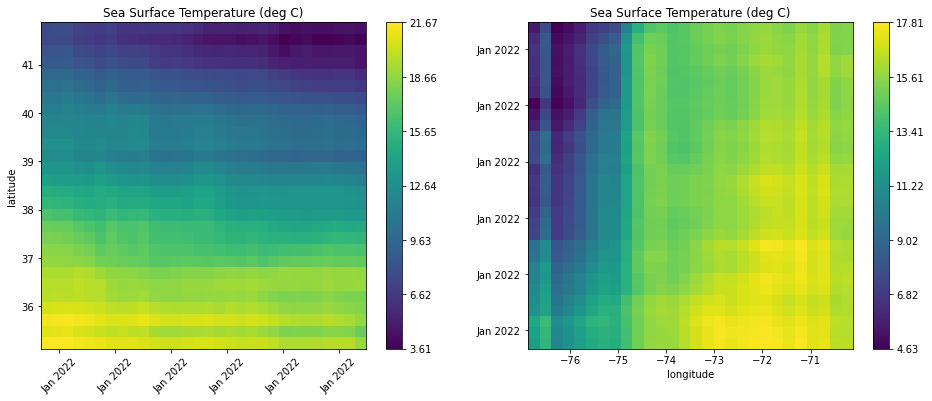

In [21]:
# Extract the actual output data
hm_lat = hm_lat_json["data"]
hm_lon = hm_lon_json["data"]

# Plot the Hovmoller maps
hovfig = plot_hovmoller(hm_lat, coord_series_key="lats", coord_point_key="latitude", 
                        coord_axis_vert=True, subplot=121, 
                        title="Sea Surface Temperature (deg C)")
hovfig = plot_hovmoller(hm_lon, coord_series_key="lons", coord_point_key="longitude",
                        coord_axis_vert=False, hovfig=hovfig, subplot=122,
                        title="Sea Surface Temperature (deg C)")